In [1]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [23]:
import pandas as pd
inmuebles = pd.read_csv('/content/drive/MyDrive/inmersion_datos/inmuebles_bogota.csv')
inmuebles.head(1)

,Tipo,Descripcion,Habitaciones,Baños,Área,Barrio,UPZ,Valor
0,Apartamento,Apartamento en venta en Zona Noroccidental,3,2,70,Zona Noroccidental,CHAPINERO: Pardo Rubio + Chapinero,$ 360.000.000


In [30]:
valor = inmuebles.Valor.str.split(expand=True)
inmuebles['Moneda'] = valor[0]
inmuebles['Precio'] = valor[1]
inmuebles.sample()

,Tipo,Descripcion,Habitaciones,Baños,Área,Barrio,UPZ,Valor,Moneda,Precio,Precio_Millon
6218,Apartamento,Apartamento en venta en Cantagallo,3,2,75,Cantagallo,Britalia,$ 449.000.000,$,449.000.000,449.00


In [31]:
columnas = {'Baños':'Banos','Área':'Area'}
inmuebles = inmuebles.rename(columns=columnas)
inmuebles.sample()

,Tipo,Descripcion,Habitaciones,Banos,Area,Barrio,UPZ,Valor,Moneda,Precio,Precio_Millon
6135,Apartamento,Apartamento en venta en Kennedy,3,1,51,Kennedy,Kennedy Central,$ 177.000.000,$,177.000.000,177.00


In [32]:
valor = inmuebles.Valor.str.split(expand=True)
inmuebles['Moneda'] = valor[0]
inmuebles['Precio'] = valor[1]
inmuebles.sample()

,Tipo,Descripcion,Habitaciones,Banos,Area,Barrio,UPZ,Valor,Moneda,Precio,Precio_Millon
568,Apartamento,Apartamento en venta en Bella Suiza,1,2,66,Bella Suiza,USAQUÉN: Country Club + Santa Bárbara,$ 400.000.000,$,400.000.000,400.00


In [33]:
inmuebles['Precio'] = inmuebles['Precio'].str.replace('.','',regex=True)
inmuebles['Precio_Millon'] = inmuebles.Precio.astype('float')/1000000
pd.set_option('display.precision',2)
pd.set_option('display.float_format', lambda x: '%.2f' % x)

#**Aula 3**
Resolución de desafío: Precio de metro cuadrado(m2) por barrio y hacer el gráfico más adecuado para esta nueva variable.

In [36]:
inmuebles['Valor_m2_Millon'] = inmuebles['Precio_Millon']/inmuebles['Area']
inmuebles.head(3)


,Tipo,Descripcion,Habitaciones,Banos,Area,Barrio,UPZ,Valor,Moneda,Precio,Precio_Millon,Valor_m2_Millon
0,Apartamento,Apartamento en venta en Zona Noroccidental,3,2,70,Zona Noroccidental,CHAPINERO: Pardo Rubio + Chapinero,$ 360.000.000,$,360000000,360.00,5.14
1,Casa,Casa en venta en Castilla,4,3,170,Castilla,KENNEDY: Castilla + Bavaria,$ 670.000.000,$,670000000,670.00,3.94
2,Apartamento,Apartamento en venta en Chico Reservado,3,3,144,Chico Reservado,CHAPINERO: Chicó Lago + El Refugio,$ 1.120.000.000,$,1120000000,1120.00,7.78


In [38]:
inmuebles.groupby('Barrio').mean() #groupby agrupa por barrios

,Habitaciones,Banos,Area,Precio_Millon,Valor_m2_Millon
Barrio,,,,,
Alameda,3.00,2.00,97.00,580.00,5.98
Alhambra,3.00,2.94,190.41,752.35,4.33
Andes Norte,3.00,2.86,124.86,709.57,6.05
Antonio Nariño,4.31,2.50,163.06,459.22,3.53
Barrancas,2.87,2.13,70.20,314.13,4.42
...,...,...,...,...,...
Villa Maria,4.69,3.69,207.15,402.85,2.04
Villas De Granada,3.45,2.32,86.59,282.30,3.17
Villemar,2.94,2.06,76.89,303.83,3.99


In [39]:
datos_barrio = inmuebles.groupby('Barrio').sum()
datos_barrio

,Habitaciones,Banos,Area,Precio_Millon,Valor_m2_Millon
Barrio,,,,,
Alameda,3,2,97,580.00,5.98
Alhambra,51,50,3237,12790.00,73.56
Andes Norte,21,20,874,4967.00,42.35
Antonio Nariño,207,120,7827,22042.65,169.47
Barrancas,43,32,1053,4712.00,66.24
...,...,...,...,...,...
Villa Maria,61,48,2693,5237.00,26.58
Villas De Granada,76,51,1905,6210.62,69.71
Villemar,53,37,1384,5469.00,71.81


In [40]:
datos_barrio['Valor_m2_Barrio'] = datos_barrio['Precio_Millon']/datos_barrio['Area']
datos_barrio

,Habitaciones,Banos,Area,Precio_Millon,Valor_m2_Millon,Valor_m2_Barrio
Barrio,,,,,,
Alameda,3,2,97,580.00,5.98,5.98
Alhambra,51,50,3237,12790.00,73.56,3.95
Andes Norte,21,20,874,4967.00,42.35,5.68
Antonio Nariño,207,120,7827,22042.65,169.47,2.82
Barrancas,43,32,1053,4712.00,66.24,4.47
...,...,...,...,...,...,...
Villa Maria,61,48,2693,5237.00,26.58,1.94
Villas De Granada,76,51,1905,6210.62,69.71,3.26
Villemar,53,37,1384,5469.00,71.81,3.95


In [50]:
dict(datos_barrio['Valor_m2_Barrio'])

{'Alameda': 5.979381443298969,
 'Alhambra': 3.95118937287612,
 'Andes Norte': 5.683066361556064,
 'Antonio Nariño': 2.816232272901495,
 'Barrancas': 4.4748338081671415,
 'Barrios Unidos': 2.9599171141243064,
 'Bella Suiza': 6.2905507012394,
 'Bellavista Occidental': 2.522711390635919,
 'Bochica': 3.4078212290502794,
 'Bogotá D.C': 5.212760277629472,
 'Bosa': 2.6778451358697213,
 'Bosa Piamonte': 1.175,
 'Bosa Porvenir': 3.1666666666666665,
 'Bosque De Pinos': 6.046475195822455,
 'Bosque Popular': 3.864097363083164,
 'Boyaca ': 2.637421499815294,
 'Buenos Aires': 2.6,
 'Candelaria La Nueva': 4.0625,
 'Cantagallo': 5.71920581655481,
 'Capellania': 4.316791690709752,
 'Casablanca': 6.245421245421245,
 'Castilla': 3.4035893155258763,
 'Cedritos': 5.027419586695463,
 'Cerros De Suba': 6.202830188679245,
 'Chapinero': 4.58018576602501,
 'Chapinero Alto': 6.4239336492891,
 'Chapinero Central': 6.360286919831224,
 'Chico Navarra': 5.1563019620884605,
 'Chico Norte': 8.353851040924855,
 'Chico 

In [51]:
m2_barrio = dict(datos_barrio['Valor_m2_Barrio'])

In [52]:
inmuebles['Valor_m2_Barrio'] = inmuebles['Barrio']
inmuebles['Valor_m2_Barrio'] = inmuebles['Valor_m2_Barrio'].map(m2_barrio)
inmuebles.head(3)

,Tipo,Descripcion,Habitaciones,Banos,Area,Barrio,UPZ,Valor,Moneda,Precio,Precio_Millon,Valor_m2_Millon,Valor_m2_Barrio
0,Apartamento,Apartamento en venta en Zona Noroccidental,3,2,70,Zona Noroccidental,CHAPINERO: Pardo Rubio + Chapinero,$ 360.000.000,$,360000000,360.00,5.14,4.57
1,Casa,Casa en venta en Castilla,4,3,170,Castilla,KENNEDY: Castilla + Bavaria,$ 670.000.000,$,670000000,670.00,3.94,3.40
2,Apartamento,Apartamento en venta en Chico Reservado,3,3,144,Chico Reservado,CHAPINERO: Chicó Lago + El Refugio,$ 1.120.000.000,$,1120000000,1120.00,7.78,8.10


In [53]:
inmuebles['Barrio'].value_counts

<bound method IndexOpsMixin.value_counts of 0           Zona Noroccidental
1                     Castilla
2              Chico Reservado
3                      Usaquén
4                  Bella Suiza
                 ...          
9515                   Kennedy
9516    Parque Central Bavaria
9517                  Restrepo
9518                  Engativa
9519                   Tintala
Name: Barrio, Length: 9520, dtype: object>

In [54]:
inmuebles['Barrio'].value_counts()[:10]

Usaquén               1105
Zona Noroccidental     877
Bosa                   589
Kennedy                589
Cedritos               554
Barrios Unidos         473
Engativa               462
Suba                   443
Santa Barbara          438
Chapinero              332
Name: Barrio, dtype: int64

In [55]:
inmuebles['Barrio'].value_counts()[:10].index

Index(['Usaquén', 'Zona Noroccidental', 'Bosa', 'Kennedy', 'Cedritos',
       'Barrios Unidos', 'Engativa', 'Suba', 'Santa Barbara', 'Chapinero'],
      dtype='object')

In [56]:
top_barrios = inmuebles['Barrio'].value_counts()[:10].index

In [58]:
datos_barrio.reset_index(inplace=True)
datos_barrio

,index,Barrio,Habitaciones,Banos,Area,Precio_Millon,Valor_m2_Millon,Valor_m2_Barrio
0,0,Alameda,3,2,97,580.00,5.98,5.98
1,1,Alhambra,51,50,3237,12790.00,73.56,3.95
2,2,Andes Norte,21,20,874,4967.00,42.35,5.68
3,3,Antonio Nariño,207,120,7827,22042.65,169.47,2.82
4,4,Barrancas,43,32,1053,4712.00,66.24,4.47
...,...,...,...,...,...,...,...,...
144,144,Villa Maria,61,48,2693,5237.00,26.58,1.94
145,145,Villas De Granada,76,51,1905,6210.62,69.71,3.26
146,146,Villemar,53,37,1384,5469.00,71.81,3.95
147,147,Zona Franca,2,1,54,160.00,2.96,2.96


In [59]:
datos_barrio.query('Barrio in @top_barrios')

,index,Barrio,Habitaciones,Banos,Area,Precio_Millon,Valor_m2_Millon,Valor_m2_Barrio
5,5,Barrios Unidos,1525,1196,87799,259877.76,2070.61,2.96
10,10,Bosa,1743,789,34879,93400.56,1654.36,2.68
22,22,Cedritos,1458,1348,53711,270027.73,2853.23,5.03
24,24,Chapinero,892,913,81248,372130.93,2466.03,4.58
50,50,Engativa,1676,1077,59808,172711.73,1795.71,2.89
63,63,Kennedy,2151,1233,61475,207963.65,2127.66,3.38
125,125,Santa Barbara,1073,1162,54693,320097.80,2701.88,5.85
132,132,Suba,1497,1202,61615,266406.04,2000.72,4.32
138,138,Usaquén,3109,3044,148121,837710.36,6334.04,5.66
148,148,Zona Noroccidental,2778,2204,119084,544453.06,4049.16,4.57


In [60]:
import matplotlib.pyplot as plt
import seaborn as sns

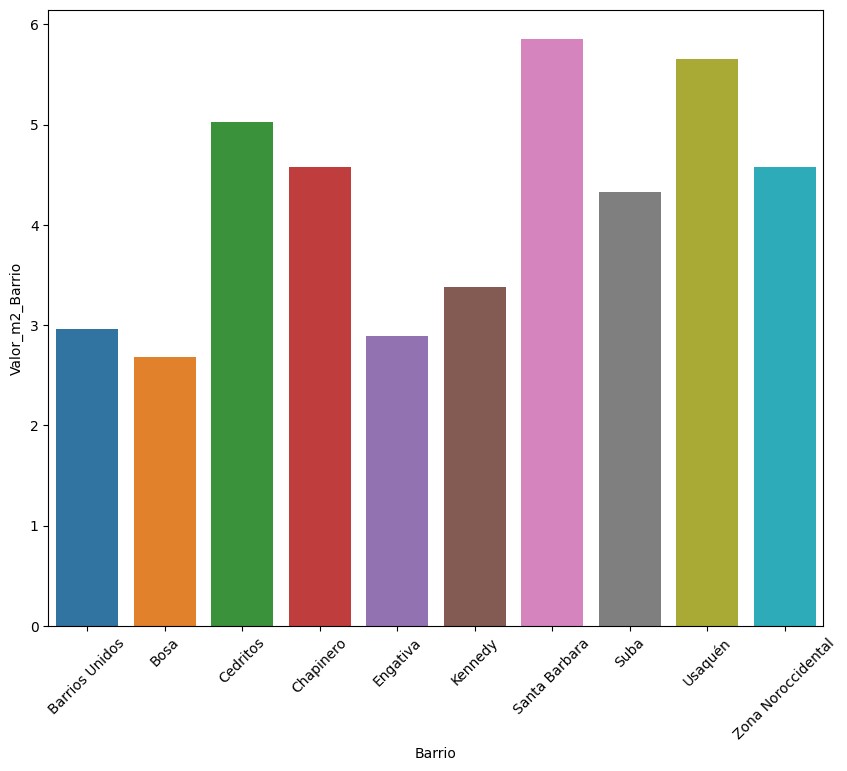

In [62]:
plt.figure(figsize=(10,8))
ax = sns.barplot(x='Barrio', y='Valor_m2_Barrio', data = datos_barrio.query('Barrio in @top_barrios'))
ax.tick_params(axis='x', rotation=45)

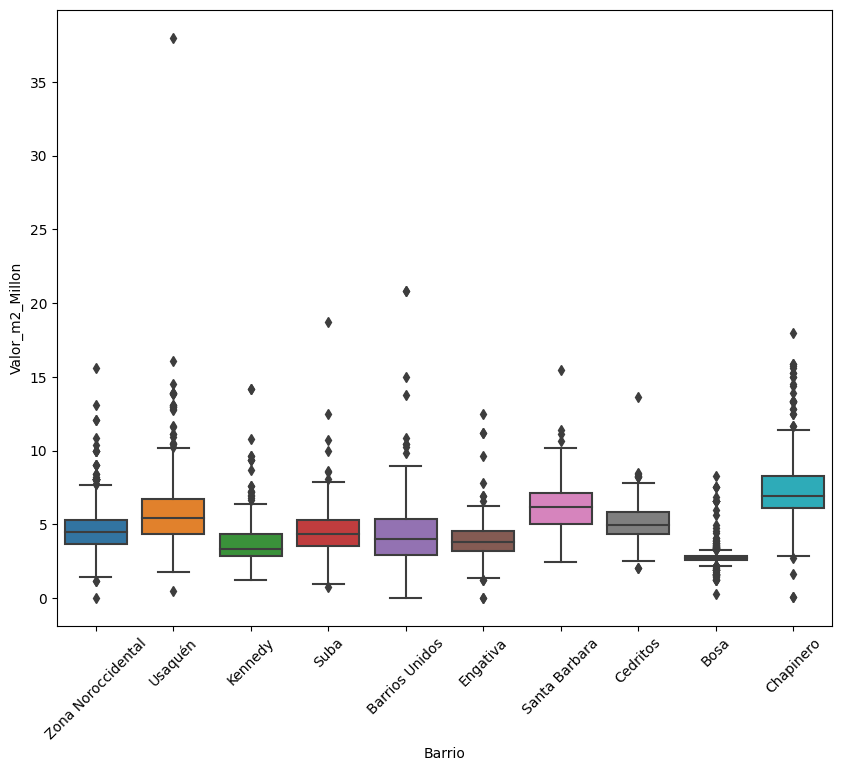

In [67]:
plt.figure(figsize=(10,8))
ax = sns.boxplot(x='Barrio', y='Valor_m2_Millon', data = inmuebles.query('Barrio in @top_barrios'))
ax.tick_params(axis='x', rotation=45)
plt.show()

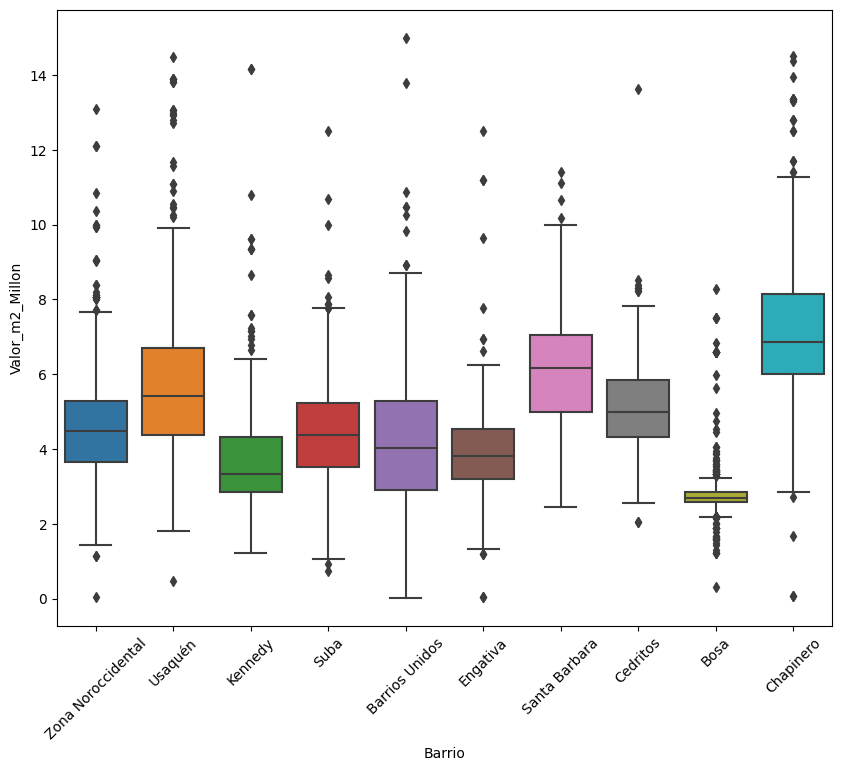

In [69]:
plt.figure(figsize=(10,8))
ax = sns.boxplot(x='Barrio', y='Valor_m2_Millon', data = inmuebles.query('Barrio in @top_barrios & Valor_m2_Millon < 15'))
ax.tick_params(axis='x', rotation=45)
plt.show()

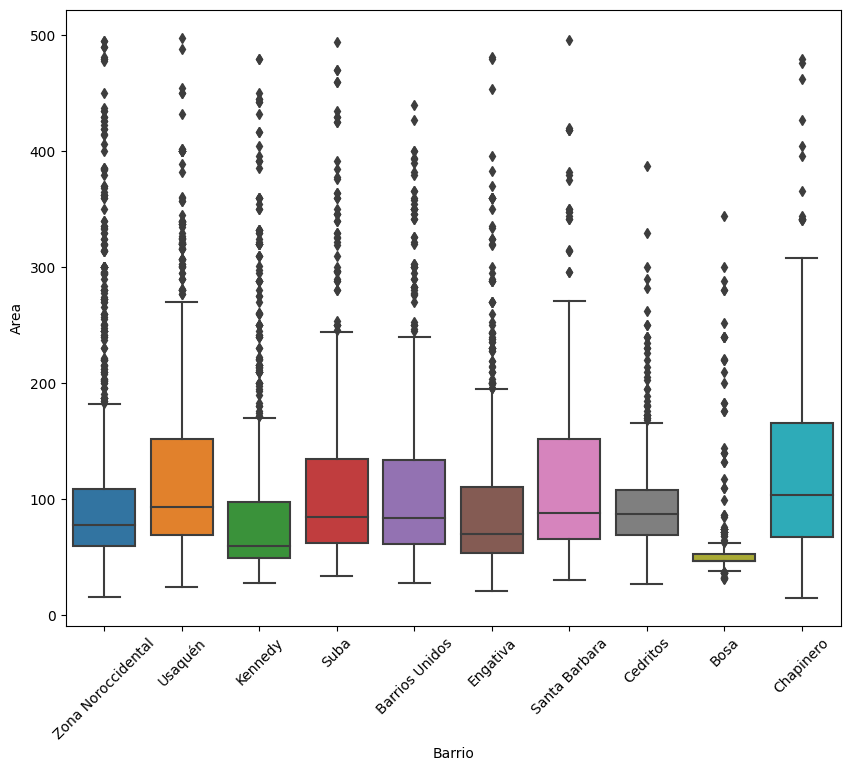

In [71]:
plt.figure(figsize=(10,8))
ax = sns.boxplot(x='Barrio', y='Area', data = inmuebles.query('Barrio in @top_barrios & Area < 500'))
ax.tick_params(axis='x', rotation=45)
plt.show()

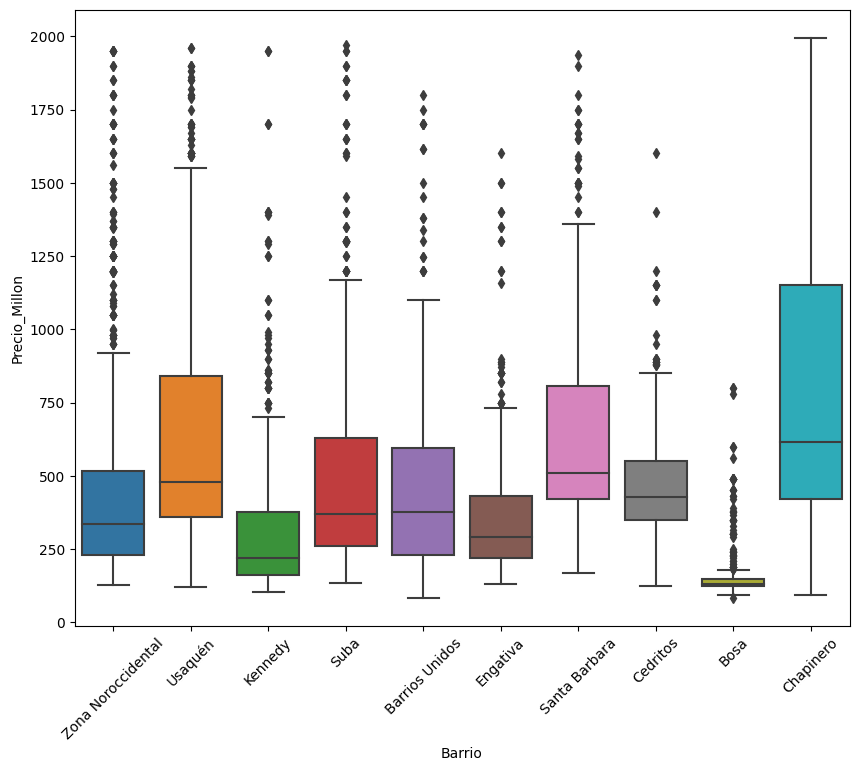

In [74]:
plt.figure(figsize=(10,8))
ax = sns.boxplot(x='Barrio', y='Precio_Millon', data = inmuebles.query('Barrio in @top_barrios & Precio_Millon < 2000'))
ax.tick_params(axis='x', rotation=45)
plt.show()


Encuesta Multipropósito Bogotá - Cundinamarca - EM - 2021
https://microdatos.dane.gov.co/index.php/catalog/743

In [77]:
datos_raw = pd.read_csv('/content/drive/MyDrive/inmersion_datos/Identificacion (Capítulo A).csv',sep=';',encoding='latin-1')
datos_raw.head()


,DIRECTORIO,DPTO,MPIO,CLASE,COD_LOCALIDAD,NOMBRE_LOCALIDAD,COD_UPZ_GRUPO,NOMBRE_UPZ_GRUPO,ESTRATO2021,NOMBRE_ESTRATO,FEX_C
0,3004346.00,11,11001,1,3.00,Santa Fe,814.00,SANTA FE: Las Nieves + Sagrado Corazón,11001187,SANTA FE: Las Nieves + Sagrado Corazón,"13,2266692027239"
1,3004347.00,11,11001,1,14.00,Los Mártires,37.00,Santa Isabel,11001162,Santa Isabel,"17,8555889419101"
2,3004348.00,11,11001,1,3.00,Santa Fe,814.00,SANTA FE: Las Nieves + Sagrado Corazón,11001187,SANTA FE: Las Nieves + Sagrado Corazón,"10,0286103658331"
3,3004349.00,11,11001,1,1.00,Usaquén,803.00,USAQUÉN: Country Club + Santa Bárbara,11001176,USAQUÉN: Country Club + Santa Bárbara,"28,6502122142802"
4,3004350.00,11,11001,1,1.00,Usaquén,803.00,USAQUÉN: Country Club + Santa Bárbara,11001176,USAQUÉN: Country Club + Santa Bárbara,"24,4684068319009"


In [78]:
datos_raw.shape

(106467, 11)

In [79]:
datos_raw = datos_raw.loc[datos_raw.MPIO == 11001]
datos_raw.shape

(86504, 11)

In [80]:
datos_b = pd.read_csv('/content/drive/MyDrive/inmersion_datos/Datos de la vivenda y su entorno (Capítulo B).csv',sep=';',encoding='latin-1')
datos_c = pd.read_csv('/content/drive/MyDrive/inmersion_datos/Condiciones habitacionales del hogar (Capítulo C).csv',sep=';',encoding='latin-1')
datos_e = pd.read_csv('/content/drive/MyDrive/inmersion_datos/Composición del hogar y demografía (Capítulo E).csv',sep=';',encoding='latin-1')
datos_h = pd.read_csv('/content/drive/MyDrive/inmersion_datos/Educacion (Capítulo H).csv',sep=';',encoding='latin-1')
datos_l = pd.read_csv('/content/drive/MyDrive/inmersion_datos/Percepcion sobre las condiciones de vida y el desempenio institucional (Capítulo L).csv',sep=';',encoding='latin-1')
datos_k = pd.read_csv('/content/drive/MyDrive/inmersion_datos/Fuerza de trabajo (Capítulo K).csv',sep=';',encoding='latin-1')    


<ipython-input-80-bc08870e4f76>:2: DtypeWarning: Columns (4,25,30,47) have mixed types. Specify dtype option on import or set low_memory=False.
  datos_c = pd.read_csv('/content/drive/MyDrive/inmersion_datos/Condiciones habitacionales del hogar (Capítulo C).csv',sep=';',encoding='latin-1')
<ipython-input-80-bc08870e4f76>:3: DtypeWarning: Columns (66) have mixed types. Specify dtype option on import or set low_memory=False.
  datos_e = pd.read_csv('/content/drive/MyDrive/inmersion_datos/Composición del hogar y demografía (Capítulo E).csv',sep=';',encoding='latin-1')
<ipython-input-80-bc08870e4f76>:4: DtypeWarning: Columns (81) have mixed types. Specify dtype option on import or set low_memory=False.
  datos_h = pd.read_csv('/content/drive/MyDrive/inmersion_datos/Educacion (Capítulo H).csv',sep=';',encoding='latin-1')
<ipython-input-80-bc08870e4f76>:5: DtypeWarning: Columns (114,117,122,126,164,166,168) have mixed types. Specify dtype option on import or set low_memory=False.
  dato

In [81]:
datos_dane = pd.merge(datos_raw, datos_b, on='DIRECTORIO', how='left')
datos_dane.shape

(86504, 73)

In [83]:
datos_dane = pd.merge(datos_dane, datos_c, on='DIRECTORIO', how='left')
datos_dane.shape

<ipython-input-83-5701787f6fee>:1: FutureWarning: Passing 'suffixes' which cause duplicate columns {'FEX_C_x'} in the result is deprecated and will raise a MergeError in a future version.
  datos_dane = pd.merge(datos_dane, datos_c, on='DIRECTORIO', how='left')


(238559, 281)

In [84]:
datos_dane = pd.merge(datos_dane, datos_e, on='DIRECTORIO', how='left')

In [85]:
datos_dane.shape

(832079, 348)

In [86]:
datos_dane.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 832079 entries, 0 to 832078
Columns: 348 entries, DIRECTORIO to FEX_C
dtypes: float64(190), int64(141), object(17)
memory usage: 2.2+ GB


**Desafío**

1. Dar un vistazo a la base de datos del DANE, comprender conceptualmente estas variables para entender mejor el contexto de esta base de datos;
2. Organizar tu notebook para que tu proyecto quede mejor presentado.